In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import matplotlib.dates as mdates
from scipy.stats import weibull_min, ks_2samp
import numpy as np
from scipy.special import gamma
from scipy.optimize import curve_fit

C:\Users\hassa\AppData\Local\Temp\ipykernel_22620\1380950483.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


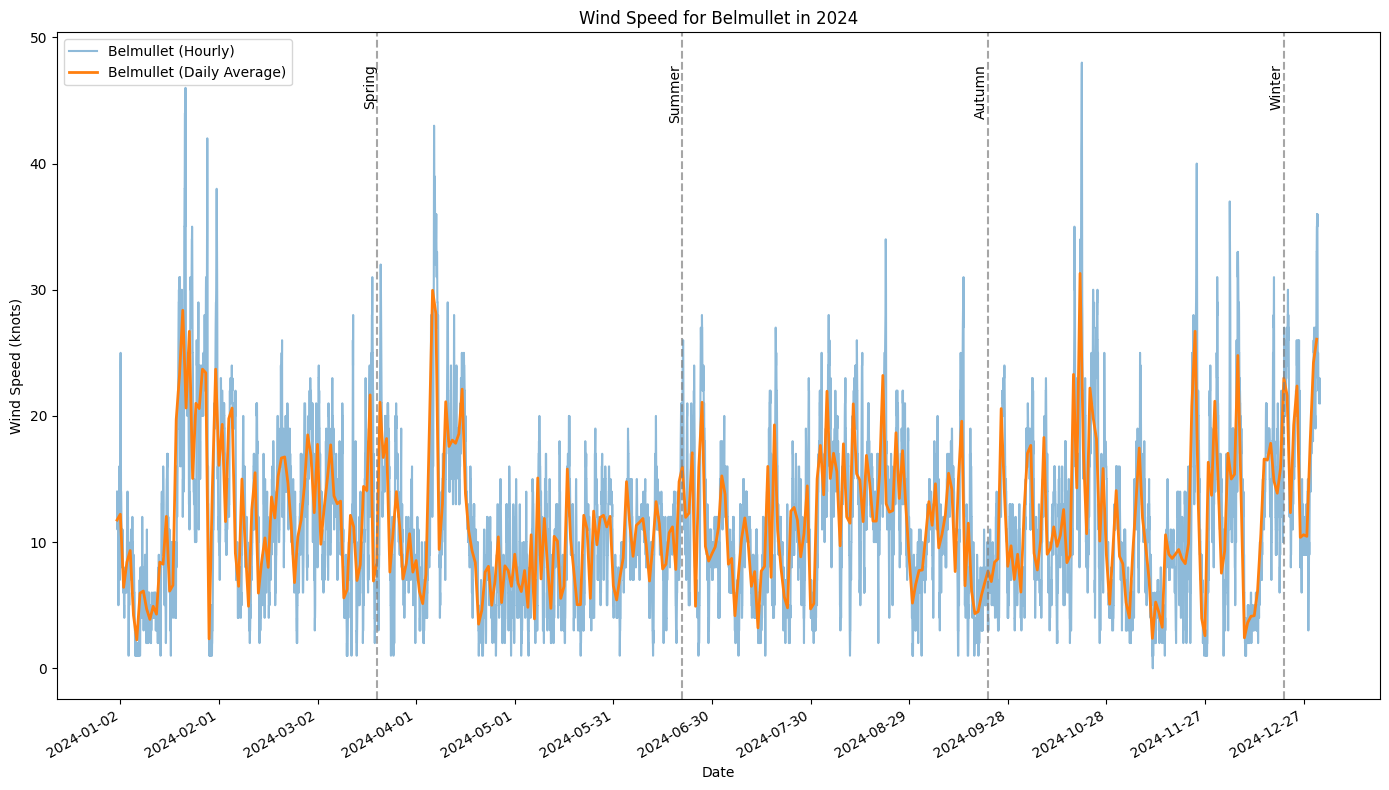

C:\Users\hassa\AppData\Local\Temp\ipykernel_22620\1380950483.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


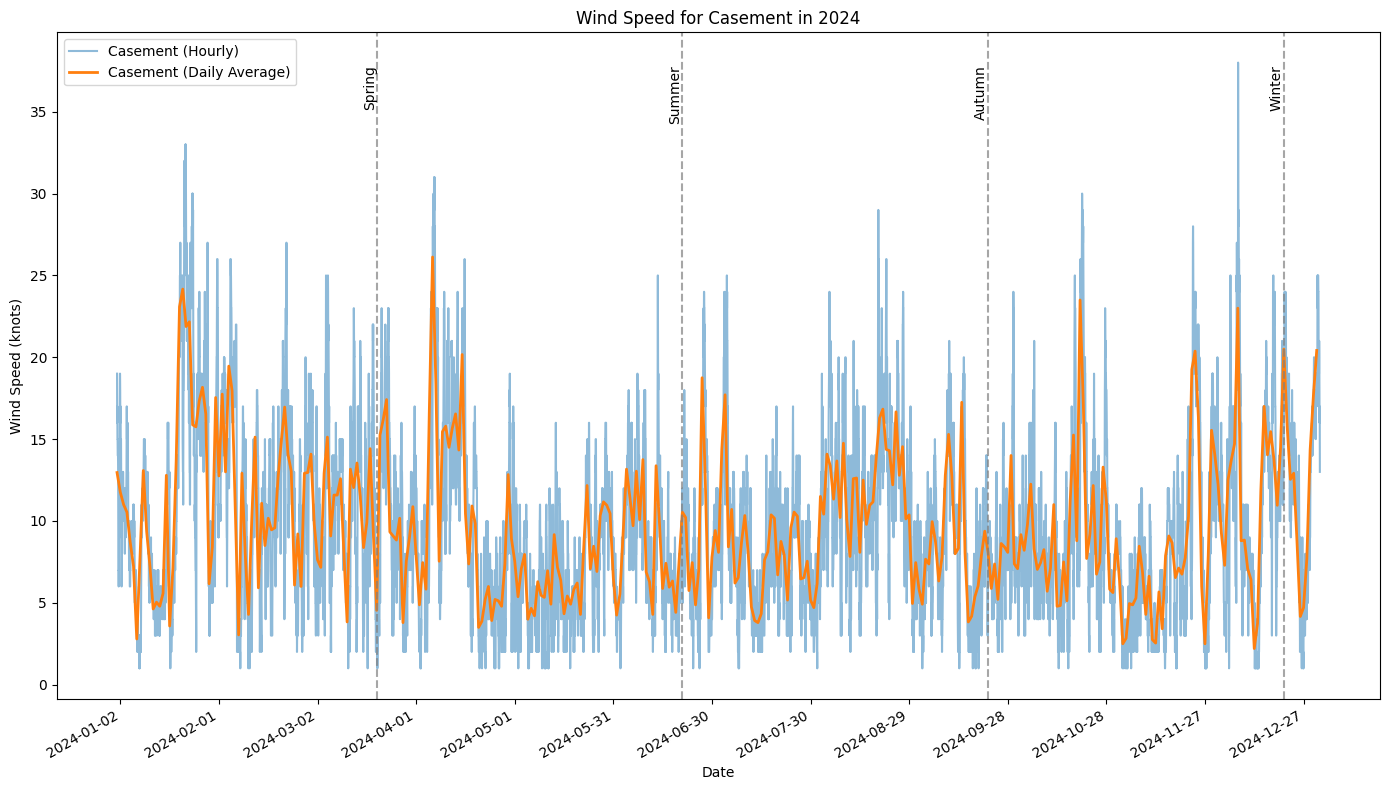

C:\Users\hassa\AppData\Local\Temp\ipykernel_22620\1380950483.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


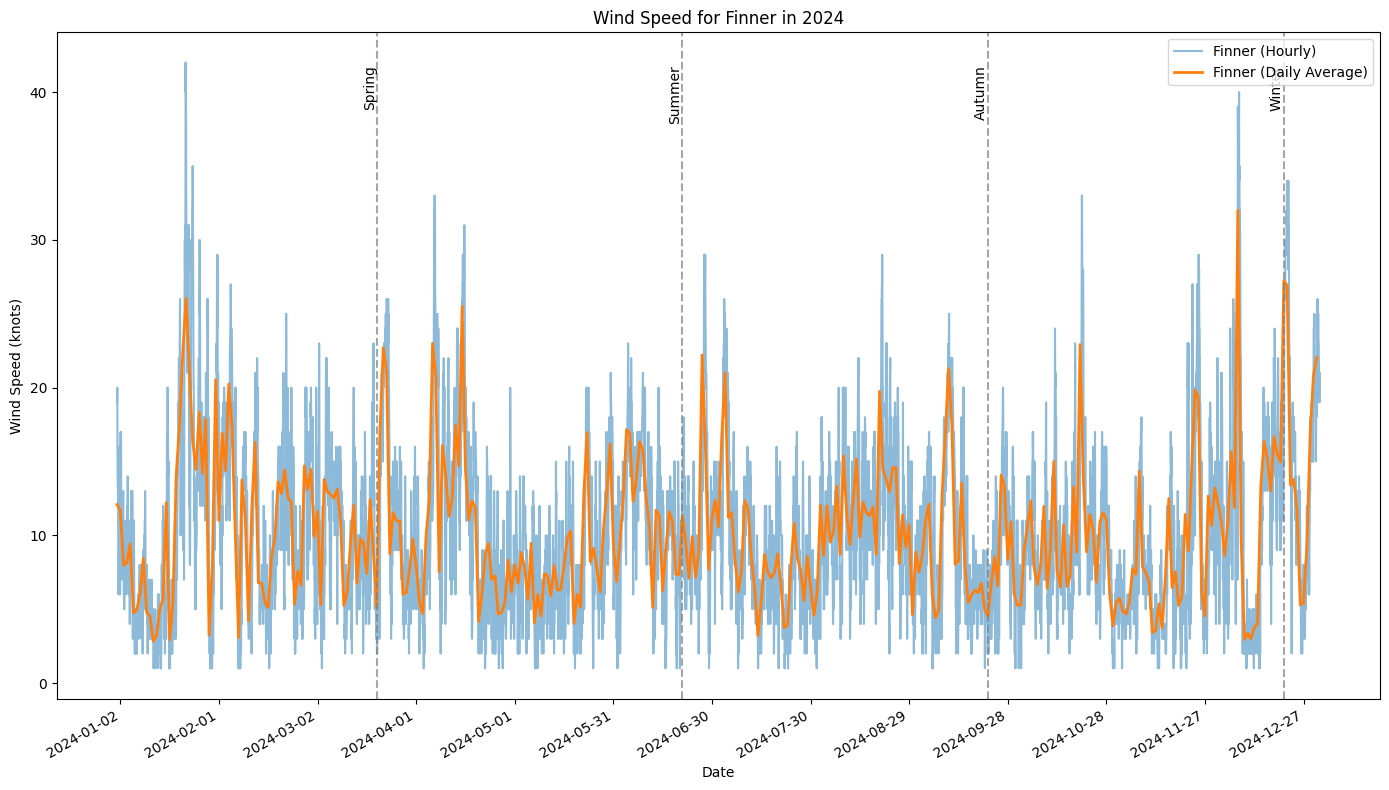

C:\Users\hassa\AppData\Local\Temp\ipykernel_22620\1380950483.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


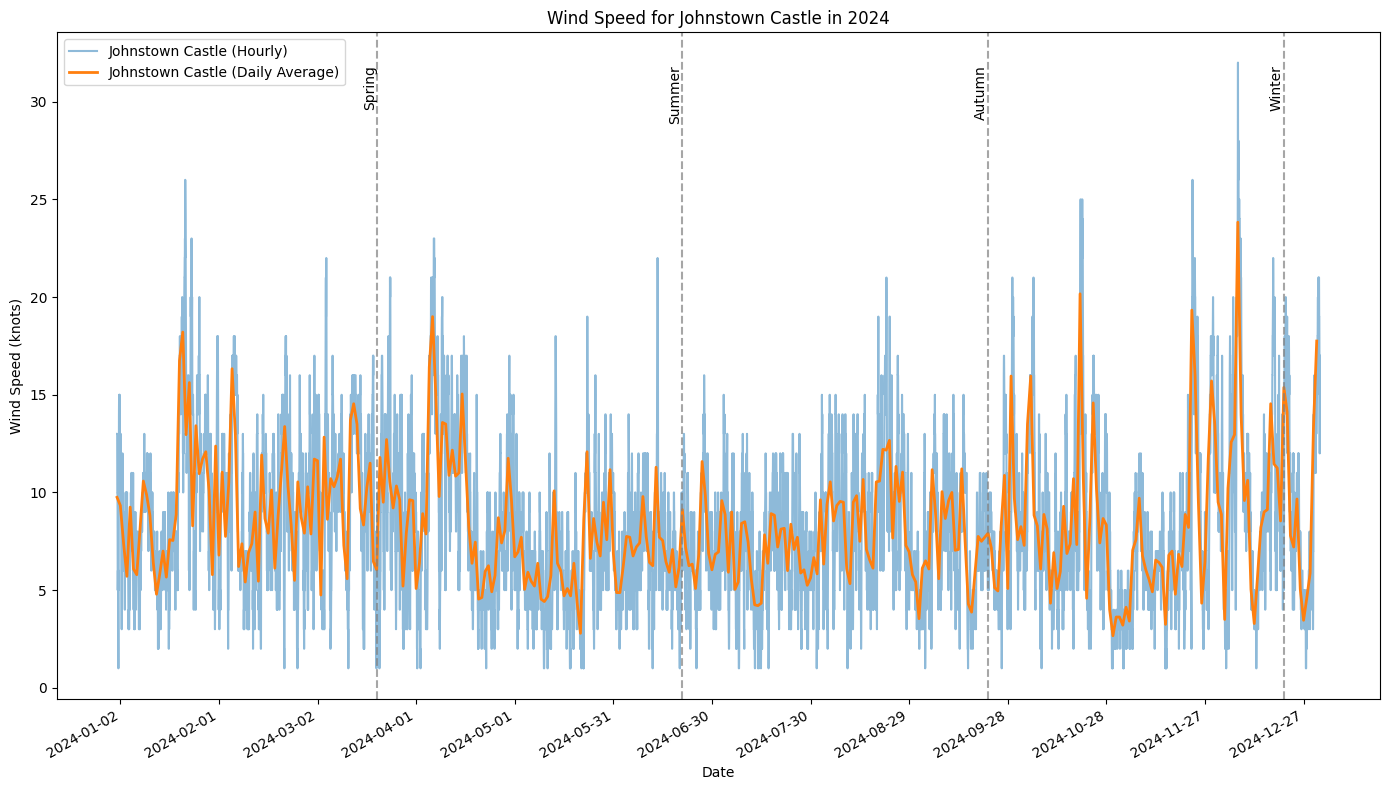

C:\Users\hassa\AppData\Local\Temp\ipykernel_22620\1380950483.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')


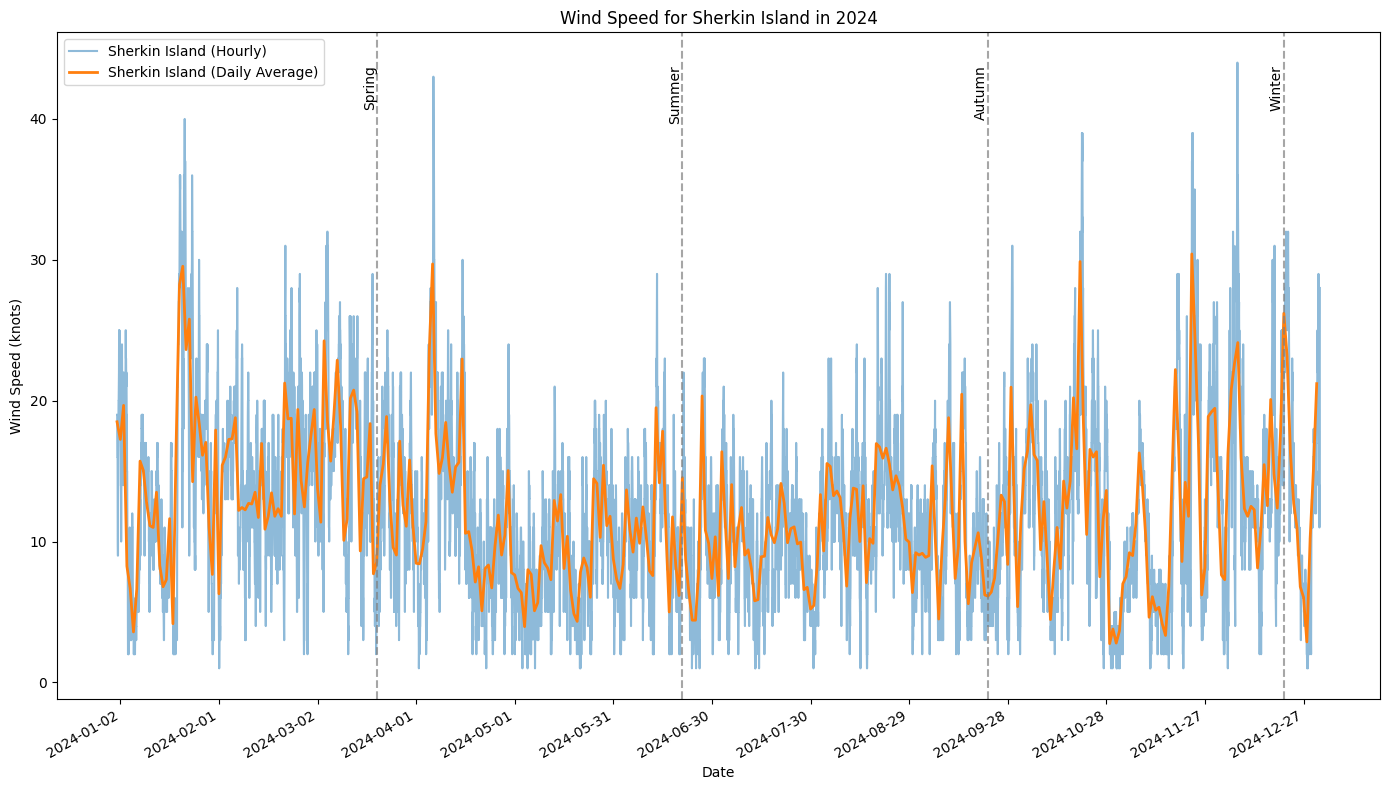

In [23]:
# Define the data directory and station files
data_dir = './data'
station_files = {
    'Belmullet': 'belmullet_hourly.csv',
    'Casement': 'casement_hourly.csv',
    'Finner': 'finner_hourly.csv',
    'Johnstown Castle': 'johnstown_castle_2_hourly.csv',
    'Sherkin Island': 'sherkinisland_hourly.csv'
}

# Define seasons with their start dates for 2024
seasons = {
    'Winter': '2024-01-01',
    'Spring': '2024-03-20',
    'Summer': '2024-06-21',
    'Autumn': '2024-09-22',
    'Winter': '2024-12-21'
}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
whole_data = {}

# Create a separate figure for each station
for station_name, file_name in station_files.items():
    plt.figure(figsize=(14, 8))

    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path, low_memory=False)
    df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
    df_2024 = df[df['date'].dt.year == 2024]

    # Convert wdsp to numeric if it's not already
    df_2024['wdsp'] = pd.to_numeric(df_2024['wdsp'], errors='coerce')
    whole_data[station_name] = df_2024

    # Plot hourly data
    plt.plot(df_2024['date'], df_2024['wdsp'], label=f'{station_name} (Hourly)',
             color=colors[0], alpha=0.5)

    # Calculate and plot daily average
    daily_avg = df_2024.groupby(df_2024['date'].dt.date)['wdsp'].mean().reset_index()
    daily_avg['date'] = pd.to_datetime(daily_avg['date'])
    plt.plot(daily_avg['date'], daily_avg['wdsp'],
             label=f'{station_name} (Daily Average)',
             color=colors[1], linewidth=2)

    # Add season markers
    for season, start_date in seasons.items():
        start = pd.to_datetime(start_date)
        if start in df_2024['date'].values or (start >= df_2024['date'].min() and start <= df_2024['date'].max()):
            plt.axvline(x=start, color='gray', linestyle='--', alpha=0.7)
            plt.text(start, plt.ylim()[1]*0.95, f"{season}",
                        rotation=90, verticalalignment='top', horizontalalignment='right')

    # Configure the plot
    plt.title(f'Wind Speed for {station_name} in 2024')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (knots)')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    # plt.savefig(f'wind_speed_{station_name.replace(" ", "_")}_2024.pdf', format='pdf')
    plt.show()

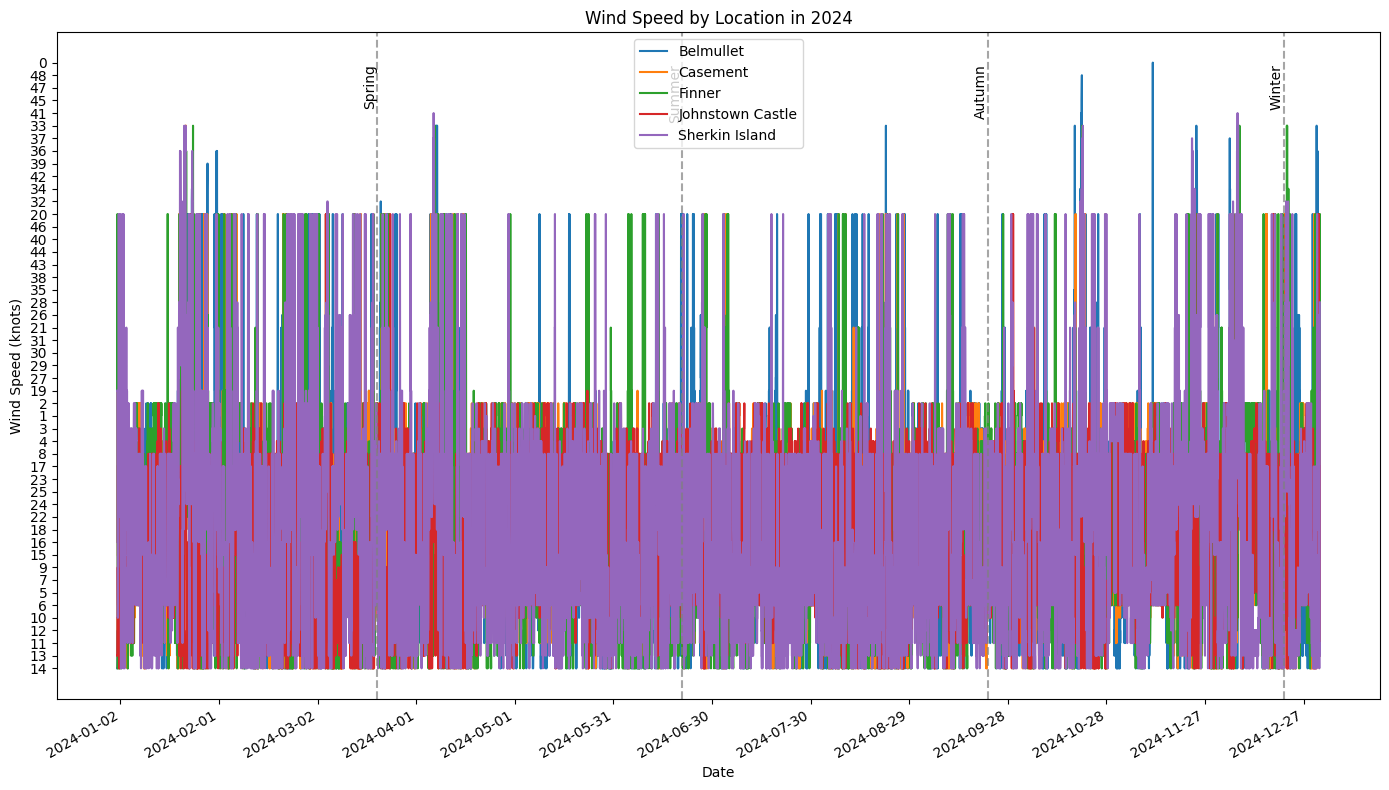

In [24]:
plt.figure(figsize=(14, 8))
for i, (station_name, file_name) in enumerate(station_files.items()):
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path, low_memory=False)
    df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
    df_2024 = df[df['date'].dt.year == 2024]
    if len(df_2024) > 0:
        plt.plot(df_2024['date'], df_2024['wdsp'], label=station_name, color=colors[i % len(colors)])

for season, start_date in seasons.items():
    start = pd.to_datetime(start_date)
    plt.axvline(x=start, color='gray', linestyle='--', alpha=0.7)
    plt.text(start, plt.ylim()[1]*0.95, f"{season}",
             rotation=90, verticalalignment='top', horizontalalignment='right')

plt.title('Wind Speed by Location in 2024')
plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
# plt.savefig('wind_speed_all_stations_2024.pdf', format='pdf')
plt.tight_layout()
plt.show()

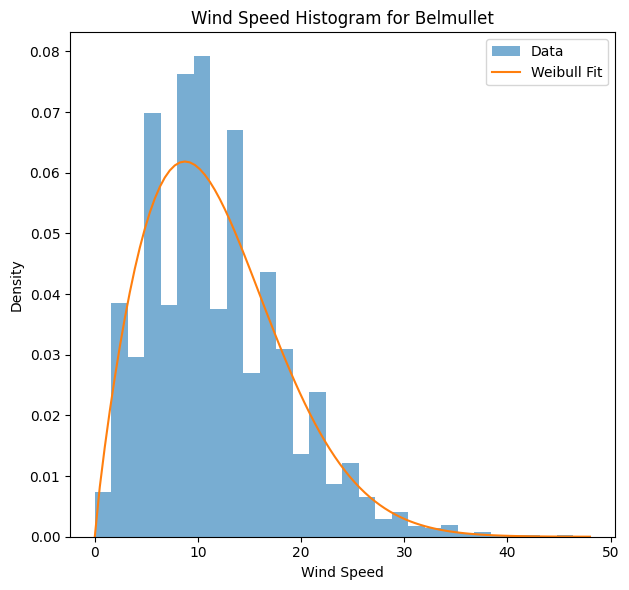

Weibull parameters for Belmullet: shape=1.86, scale=13.25


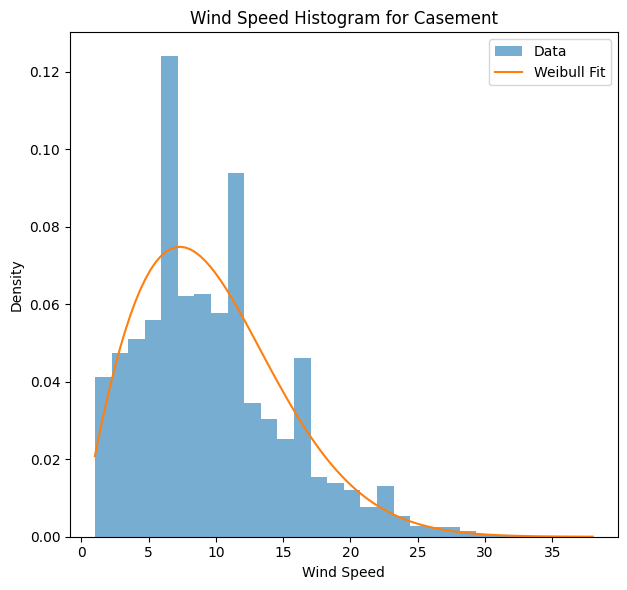

Weibull parameters for Casement: shape=1.87, scale=11.00


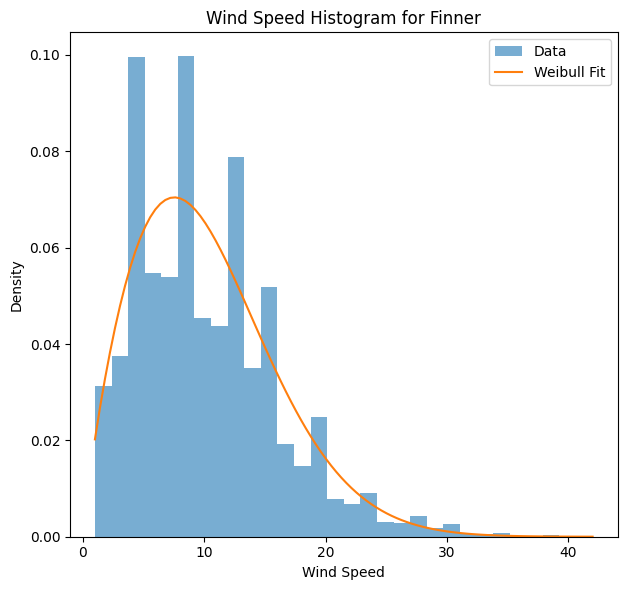

Weibull parameters for Finner: shape=1.84, scale=11.56


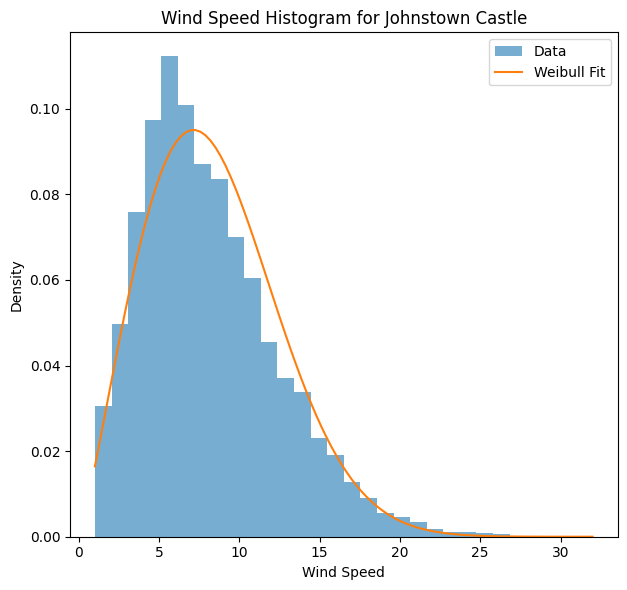

Weibull parameters for Johnstown Castle: shape=2.16, scale=9.52


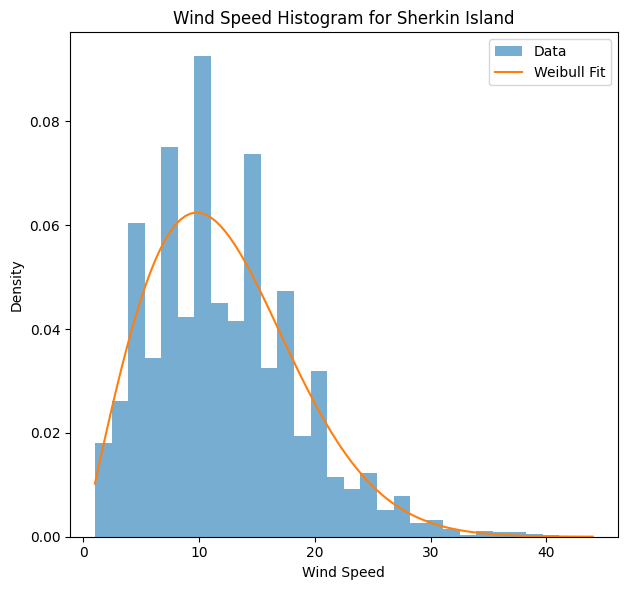

Weibull parameters for Sherkin Island: shape=2.01, scale=13.79


In [25]:
#fit weibull distribution to each station's data  (without taking seasons into account) using maximum of likelihood method
for station_name, df_2024 in whole_data.items():
    # Fit Weibull distribution
    shape, loc, scale = weibull_min.fit(df_2024['wdsp'].dropna(), floc = 0)  #drop na values, ml method

    x = np.linspace(df_2024['wdsp'].min(), df_2024['wdsp'].max(), 100)
    pdf = weibull_min.pdf(x, shape, scale=scale)

    plt.figure(figsize=(12, 6))

    # histogram and weibull distribution plot
    plt.subplot(1, 2, 1)
    plt.hist(df_2024['wdsp'], bins=30, density=True, alpha=0.6, label='Data')
    plt.plot(x, pdf, label='Weibull Fit')
    plt.title(f'Wind Speed Histogram for {station_name}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Density')
    plt.legend()


    # Weibull Distribution Plot alone
    #plt.subplot(1, 2, 2)
    #plt.plot(x, pdf, label='Weibull Distribution')
    #plt.title(f'Weibull Distribution Fit for {station_name}')
    #plt.xlabel('Wind Speed')
    #plt.ylabel('Probability Density')
    #plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Weibull parameters for {station_name}: shape={shape:.2f}, scale={scale:.2f}")


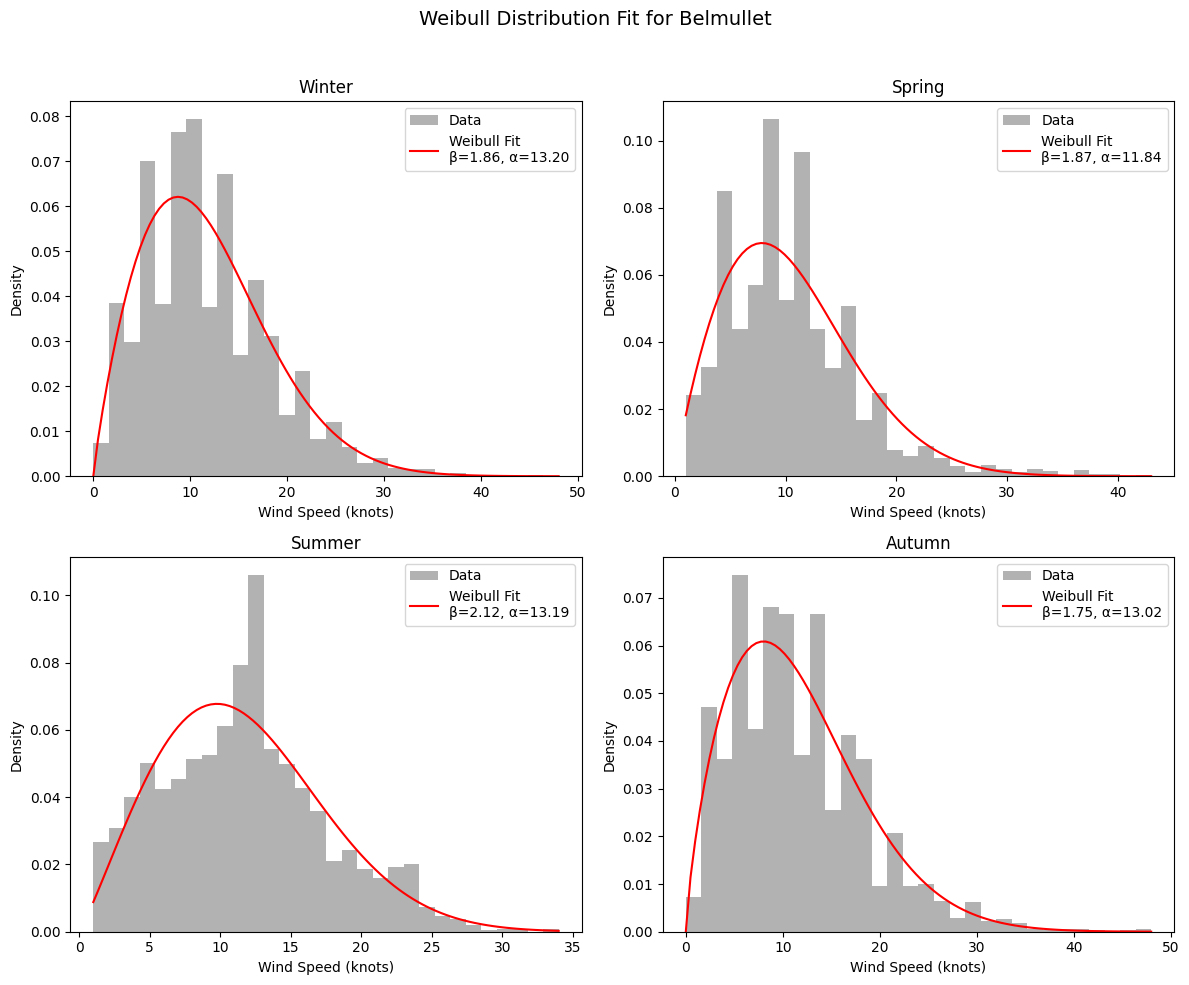

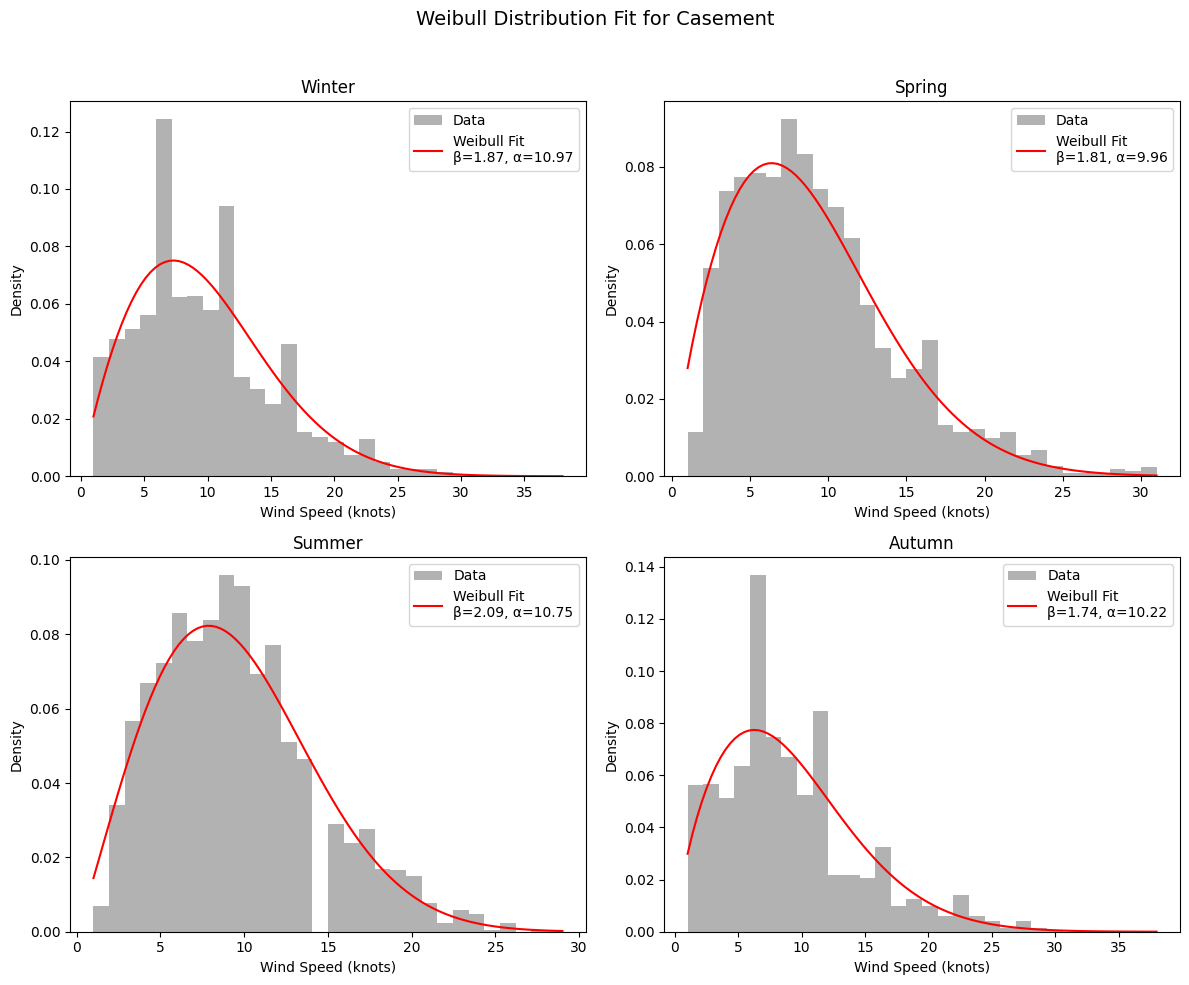

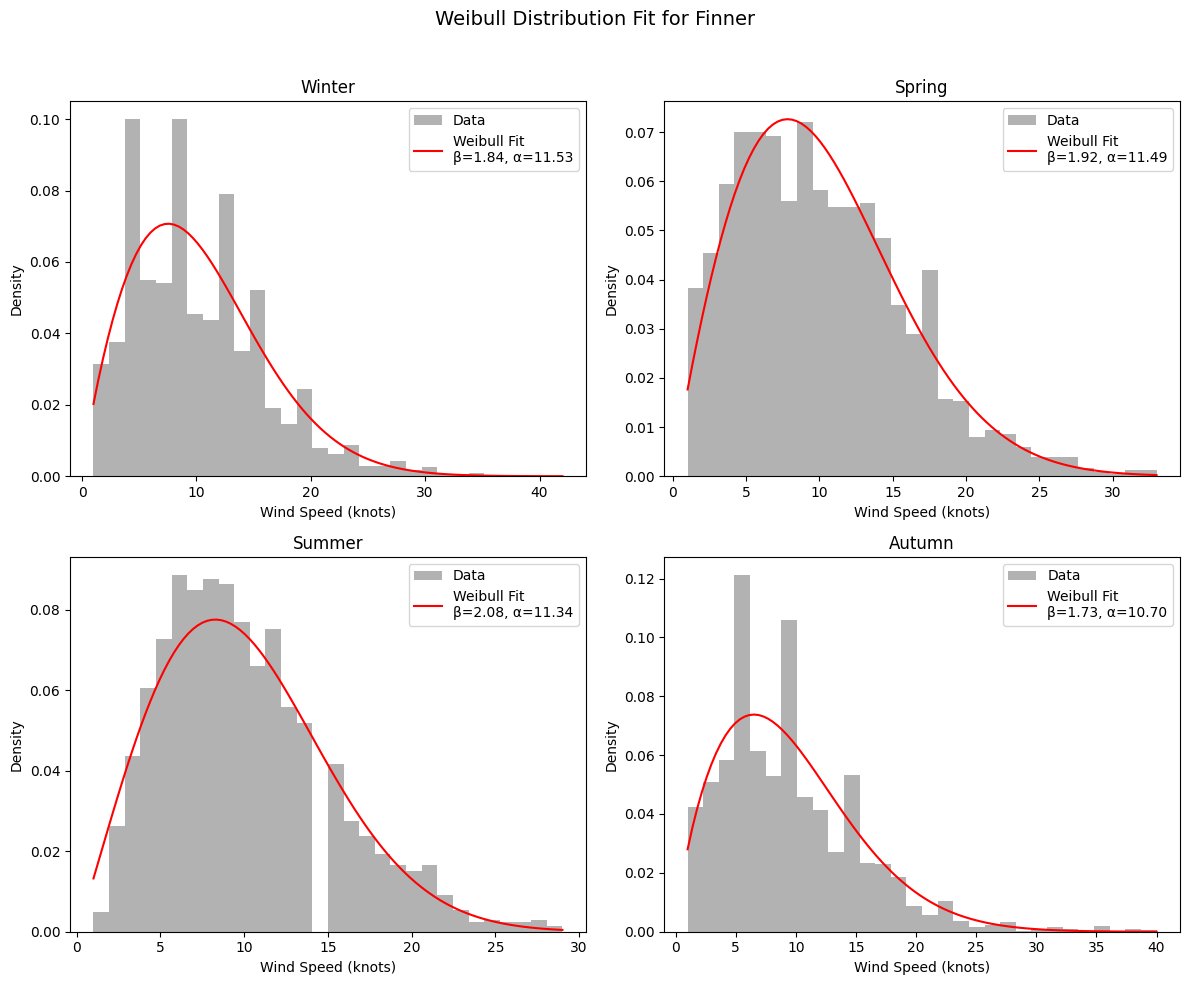

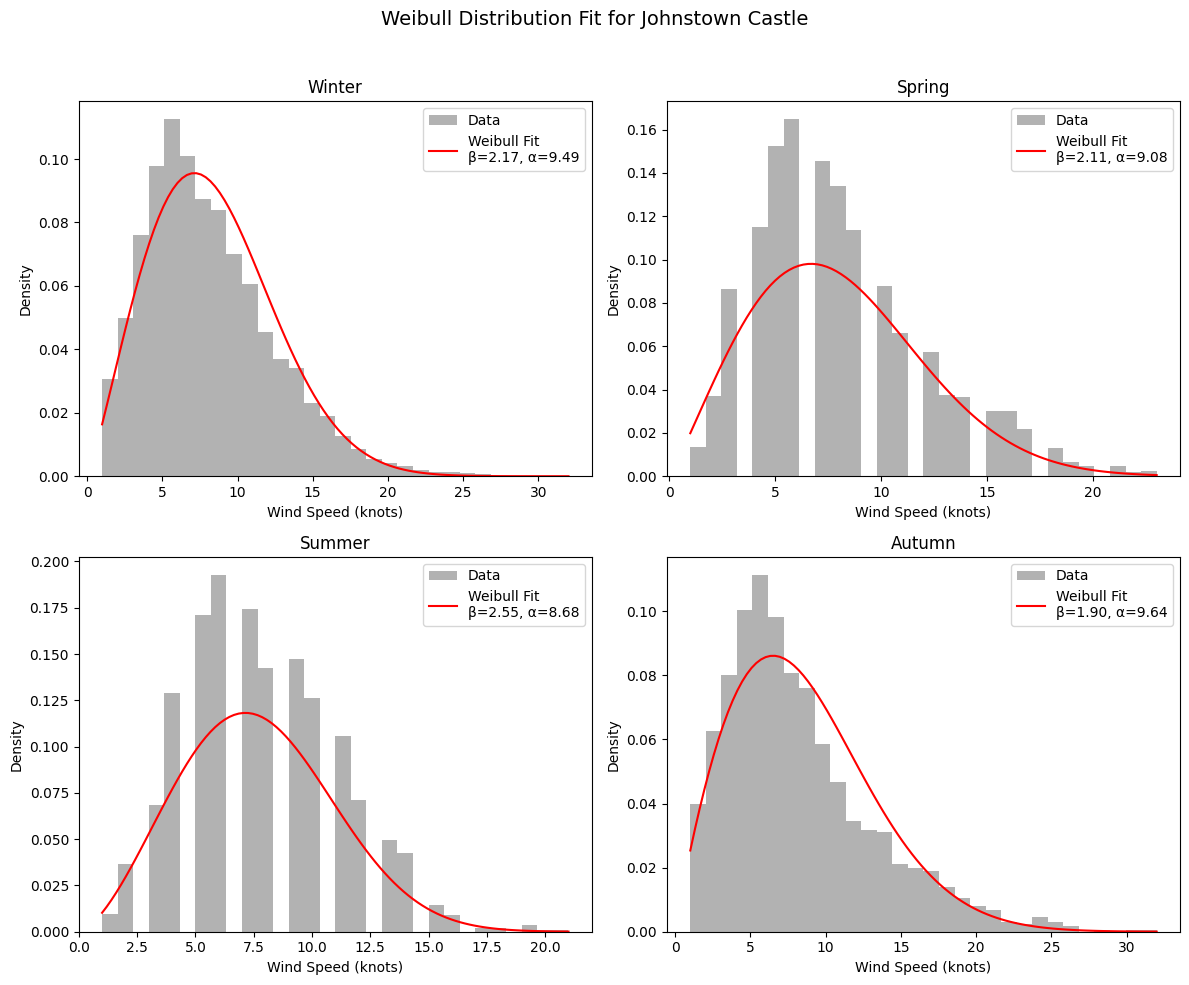

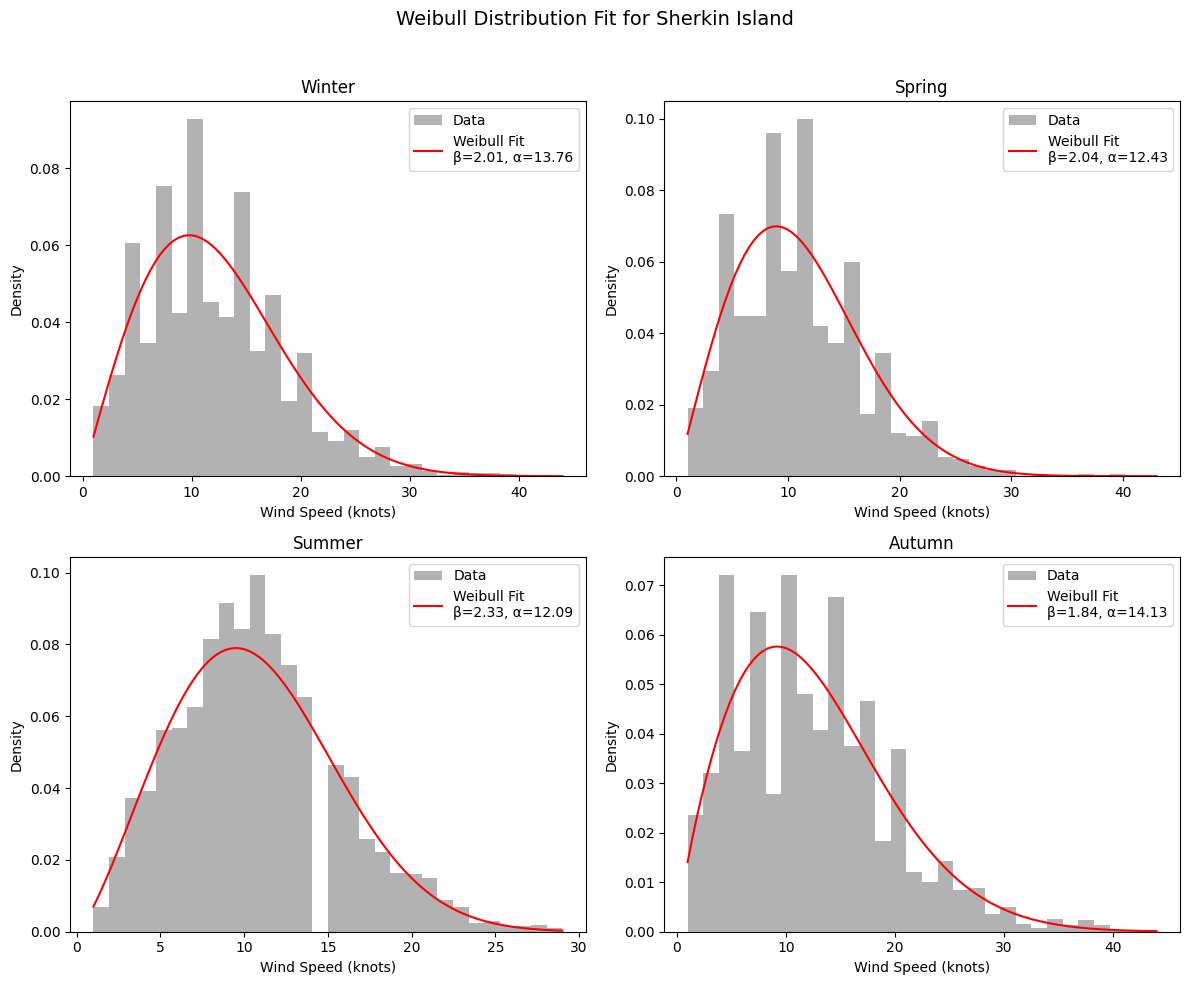

In [26]:
#fit weibull distribution to each station's data for every seasons using maximum of likelihood method

seasons = {
    'Winter1': ('2024-01-01', '2024-03-19'),
    'Spring': ('2024-03-20', '2024-06-20'),
    'Summer': ('2024-06-21', '2024-09-21'),
    'Autumn': ('2024-09-22', '2024-12-20'),
    'Winter2': ('2024-12-21', '2024-12-31')
}


# merge Winter1 and Winter2 into a single "Winter"
merged_seasons = {
    'Winter': (pd.to_datetime(seasons['Winter1'][0]), pd.to_datetime(seasons['Winter2'][1])),
    'Spring': (pd.to_datetime(seasons['Spring'][0]), pd.to_datetime(seasons['Spring'][1])),
    'Summer': (pd.to_datetime(seasons['Summer'][0]), pd.to_datetime(seasons['Summer'][1])),
    'Autumn': (pd.to_datetime(seasons['Autumn'][0]), pd.to_datetime(seasons['Autumn'][1]))
}

for station_name, df_2024 in whole_data.items():
    df_2024['date'] = pd.to_datetime(df_2024['date'])

    plt.figure(figsize=(12, 10))
    plt.suptitle(f"Weibull Distribution Fit for {station_name}", fontsize=14)

    for i, (season_name, (start_date, end_date)) in enumerate(merged_seasons.items(), start=1):
        plt.subplot(2, 2, i)

        # filter data for the current season
        season_df = df_2024[(df_2024['date'] >= start_date) & (df_2024['date'] <= end_date)]
        wind_speeds = season_df['wdsp'].dropna().values  #drop na values, ml method

        if len(wind_speeds) > 0:
            # Fit Weibull distribution
            shape, loc, scale = weibull_min.fit(wind_speeds, floc=0)
            x = np.linspace(wind_speeds.min(), wind_speeds.max(), 100)
            pdf = weibull_min.pdf(x, shape, scale=scale)

            # plot histogram and Weibull fit
            plt.hist(wind_speeds, bins=30, density=True, alpha=0.6, label="Data", color='gray')
            plt.plot(x, pdf, label=f'Weibull Fit\nβ={shape:.2f}, α={scale:.2f}', color='red')

        plt.title(f"{season_name}", fontsize=12)
        plt.xlabel("Wind Speed (knots)")
        plt.ylabel("Density")
        plt.legend(fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.show()

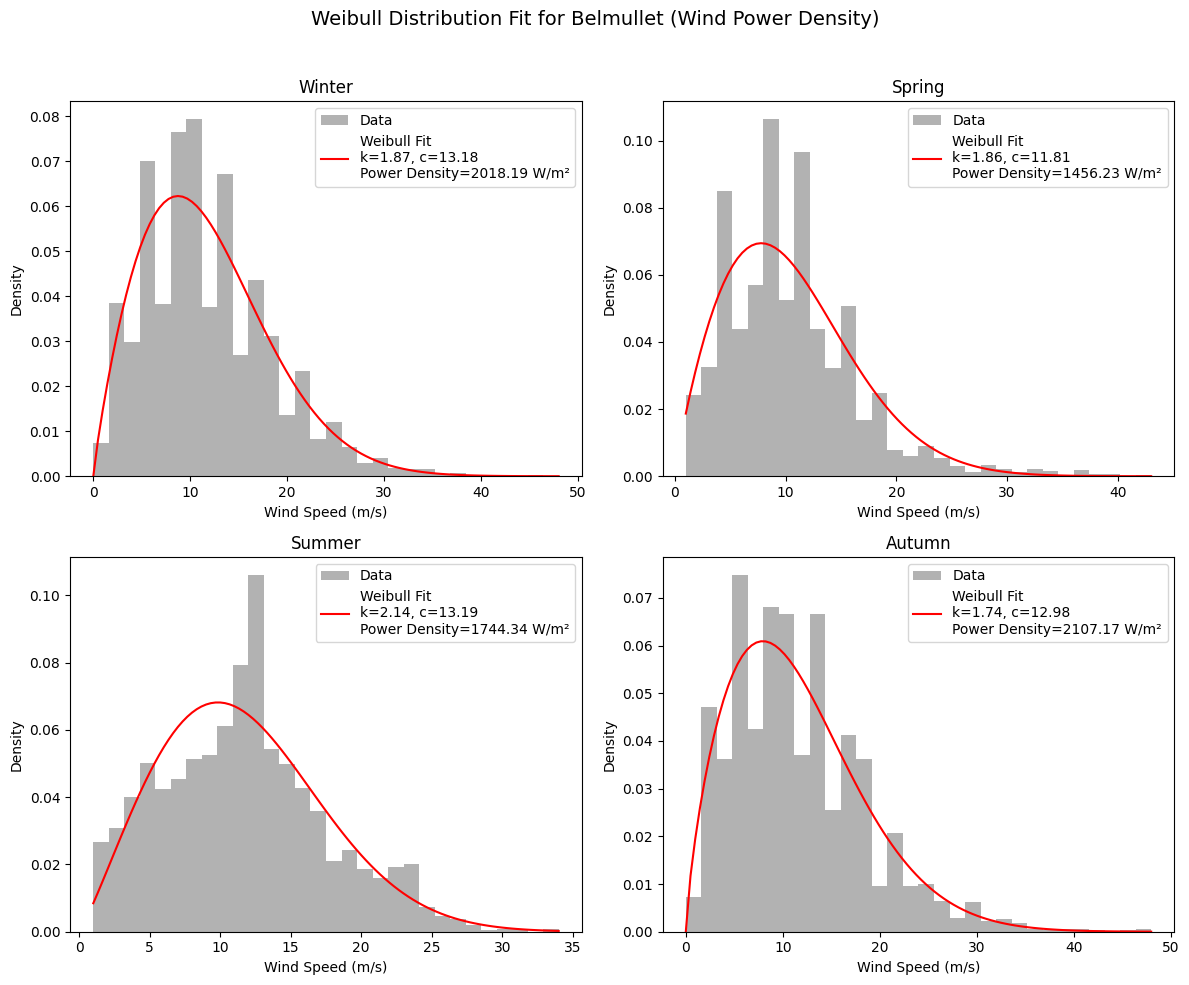

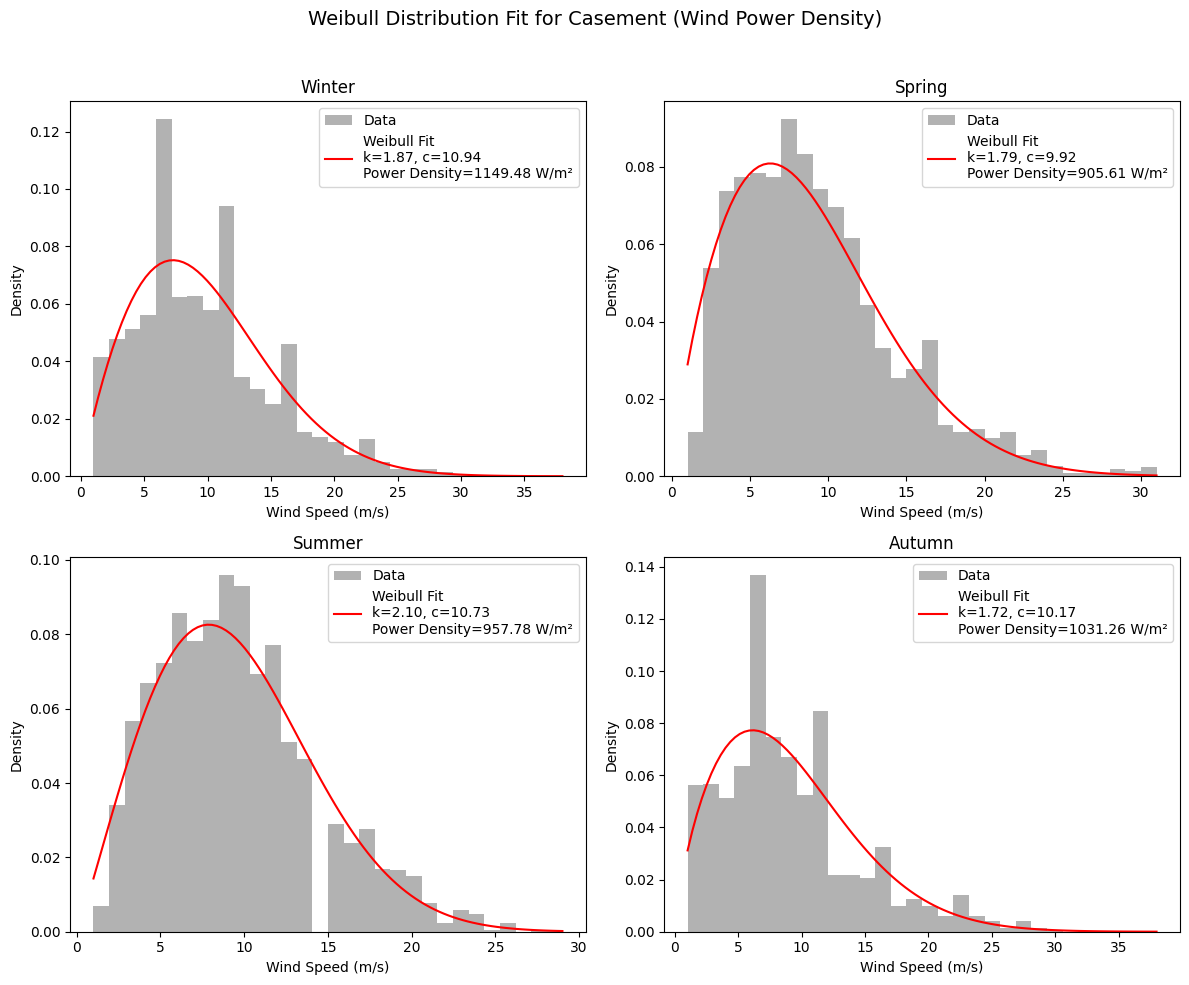

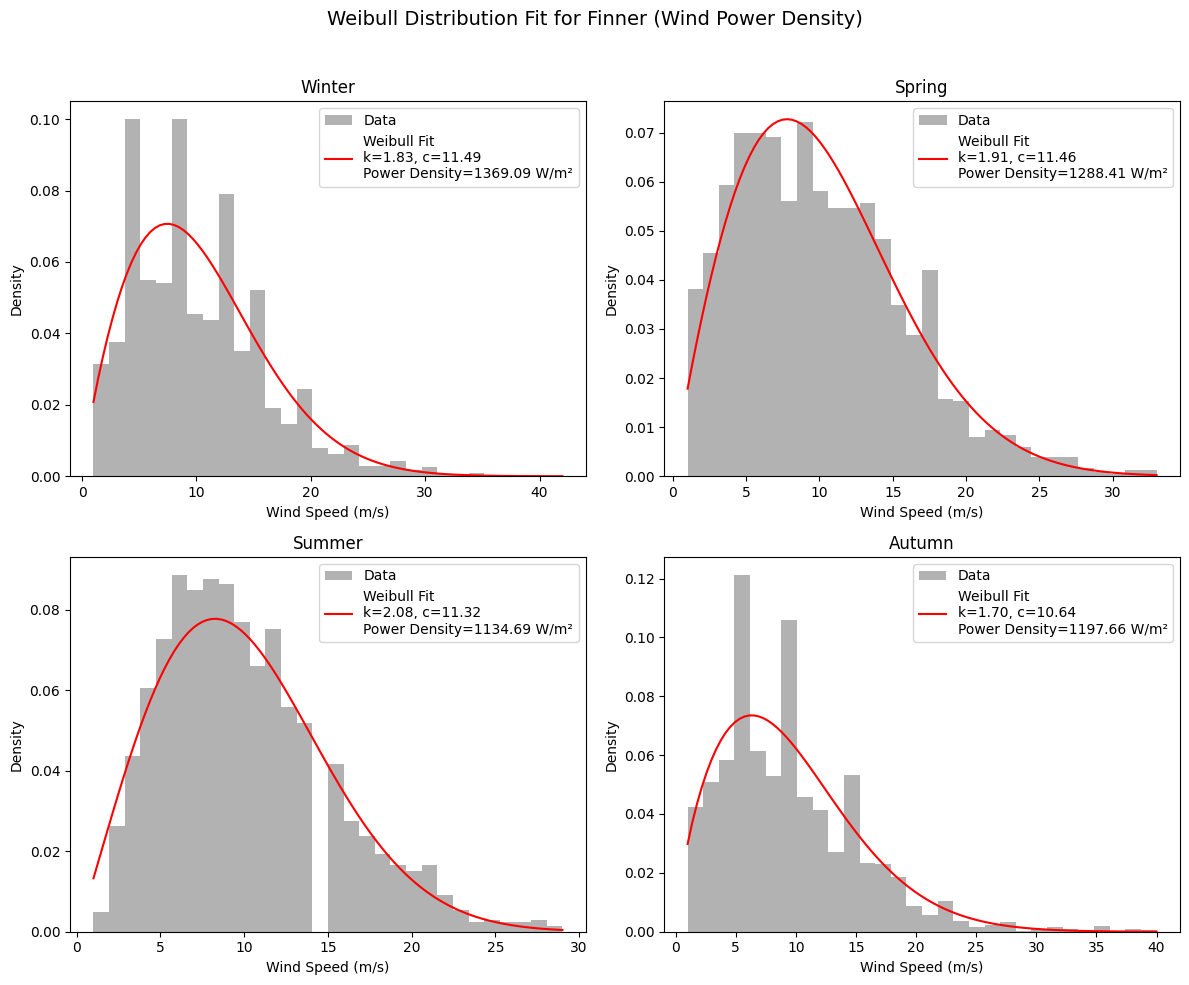

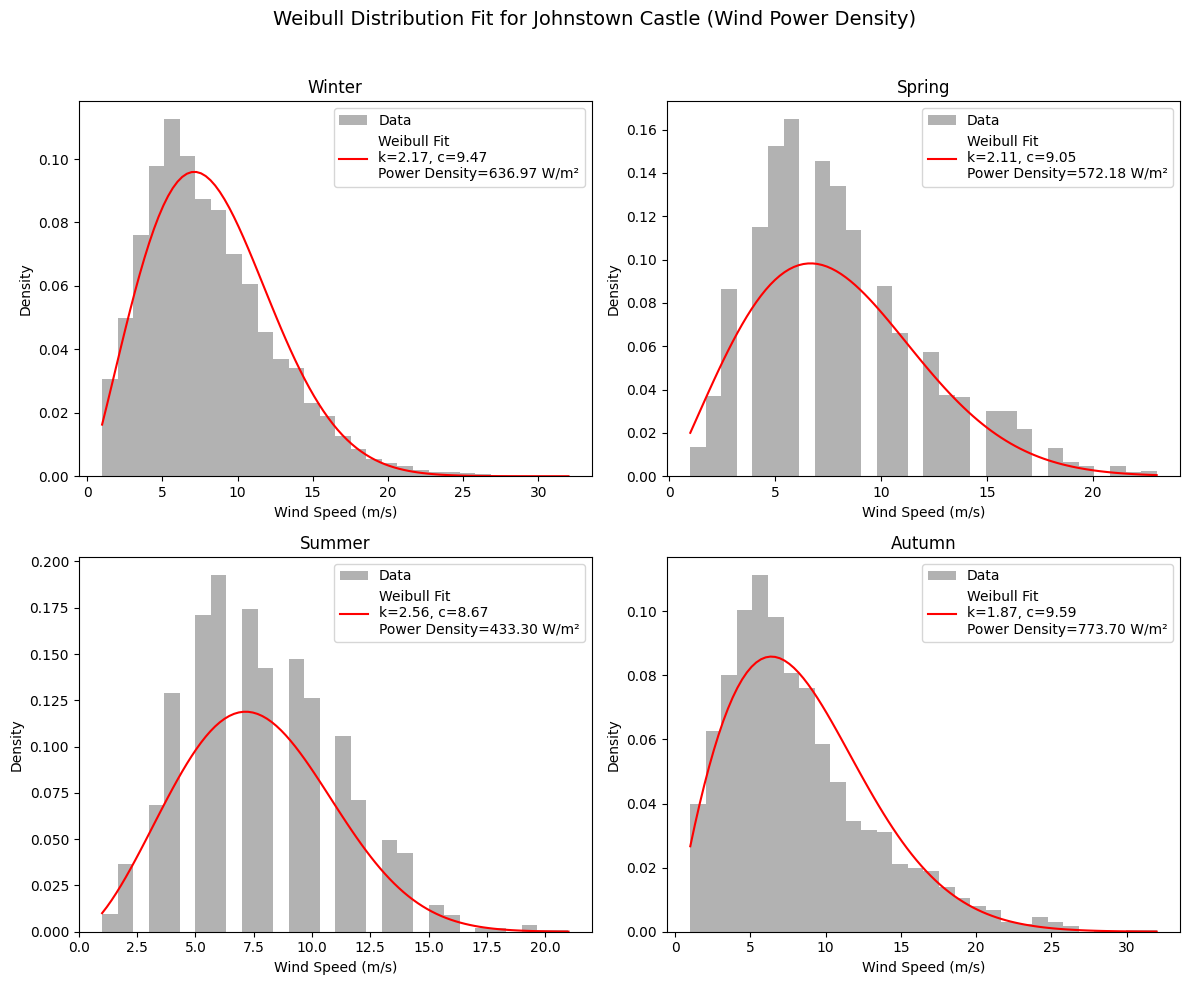

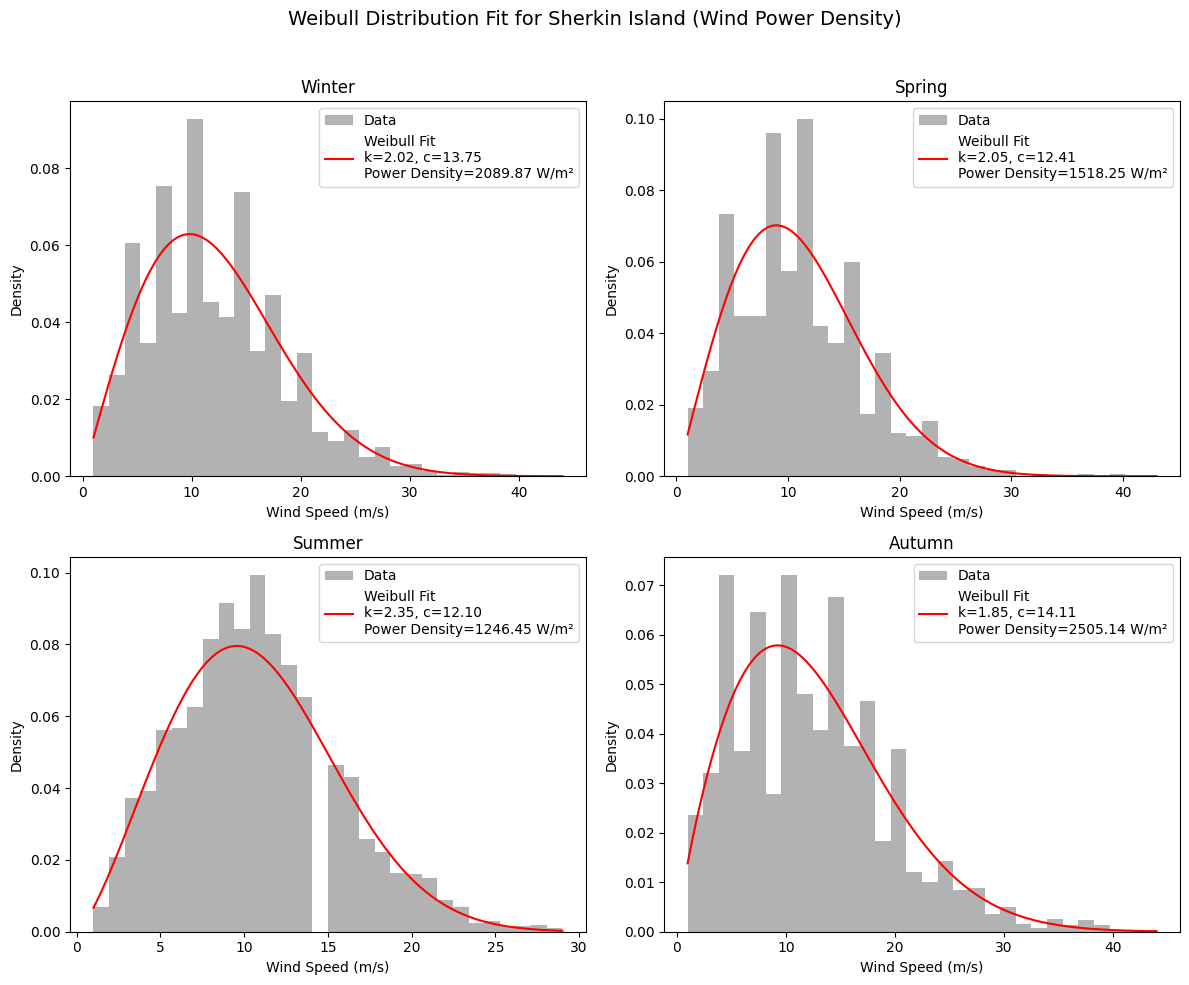

In [27]:
#fit weibull distribution to each station's data for every seasons using Wind Power Density

AIR_DENSITY = 1.225  # kg/m^3 (standard air density at sea level)

# Define seasons
seasons = {
    'Winter1': ('2024-01-01', '2024-03-19'),
    'Spring': ('2024-03-20', '2024-06-20'),
    'Summer': ('2024-06-21', '2024-09-21'),
    'Autumn': ('2024-09-22', '2024-12-20'),
    'Winter2': ('2024-12-21', '2024-12-31')
}

# Merge Winter1 and Winter2 into a single "Winter"
merged_seasons = {
    'Winter': (pd.to_datetime(seasons['Winter1'][0]), pd.to_datetime(seasons['Winter2'][1])),
    'Spring': (pd.to_datetime(seasons['Spring'][0]), pd.to_datetime(seasons['Spring'][1])),
    'Summer': (pd.to_datetime(seasons['Summer'][0]), pd.to_datetime(seasons['Summer'][1])),
    'Autumn': (pd.to_datetime(seasons['Autumn'][0]), pd.to_datetime(seasons['Autumn'][1]))
}

# Function to calculate Weibull parameters using Power Density Method
def power_density_method(wind_speeds):
    mean_wind_speed = np.mean(wind_speeds)
    std_wind_speed = np.std(wind_speeds)

    if mean_wind_speed > 0:
        k = (std_wind_speed / mean_wind_speed) ** (-1.086)
    else:
        k = 1.0
    
    if k > 0:
        c = mean_wind_speed / gamma(1 + 1 / k)
    else:
        c = 1.0
    
    return k, c

# Function to calculate wind power density
def wind_power_density(k, c):
    return 0.5 * AIR_DENSITY * (c ** 3) * gamma((k + 3) / k)

for station_name, df_2024 in whole_data.items():
    df_2024['date'] = pd.to_datetime(df_2024['date'])

    plt.figure(figsize=(12, 10))
    plt.suptitle(f"Weibull Distribution Fit for {station_name} (Wind Power Density)", fontsize=14)

    for i, (season_name, (start_date, end_date)) in enumerate(merged_seasons.items(), start=1):
        plt.subplot(2, 2, i)

        # Filter data for the current season
        season_df = df_2024[(df_2024['date'] >= start_date) & (df_2024['date'] <= end_date)]
        wind_speeds = season_df['wdsp'].dropna().values  # Drop NA values

        if len(wind_speeds) > 0:
            # Calculate Weibull parameters using Power Density Method
            k, c = power_density_method(wind_speeds)
            power_density = wind_power_density(k, c)
            
            # Generate PDF for the fitted Weibull distribution
            x = np.linspace(wind_speeds.min(), wind_speeds.max(), 100)
            pdf = weibull_min.pdf(x, k, scale=c)

            # Plot histogram and Weibull fit
            plt.hist(wind_speeds, bins=30, density=True, alpha=0.6, label="Data", color='gray')
            plt.plot(x, pdf, label=f'Weibull Fit\nk={k:.2f}, c={c:.2f}\nPower Density={power_density:.2f} W/m²', color='red')

        # Add plot labels and legend
        plt.title(f"{season_name}", fontsize=12)
        plt.xlabel("Wind Speed (m/s)")
        plt.ylabel("Density")
        plt.legend(fontsize=10)

    # Adjust layout and display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.show()

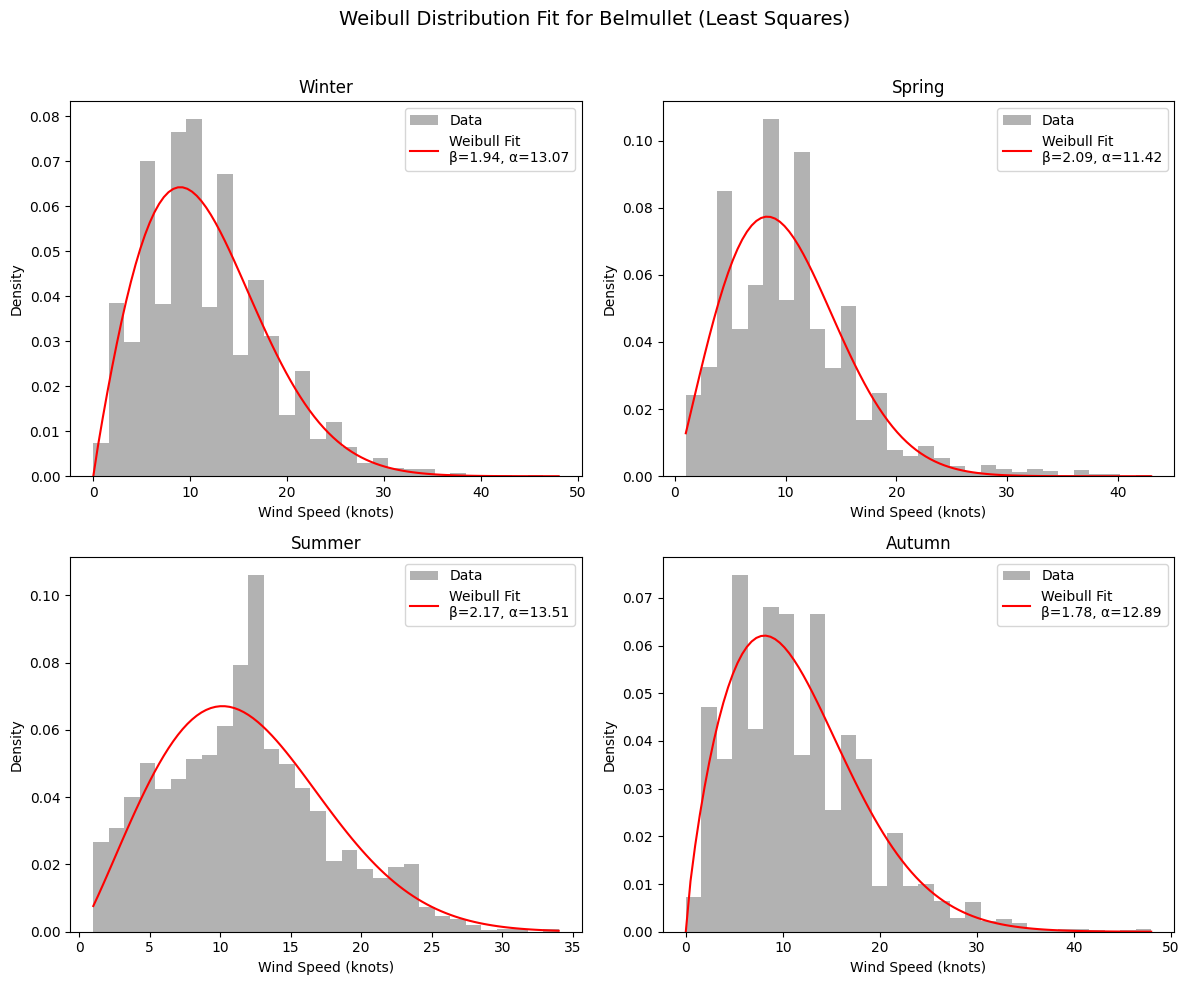

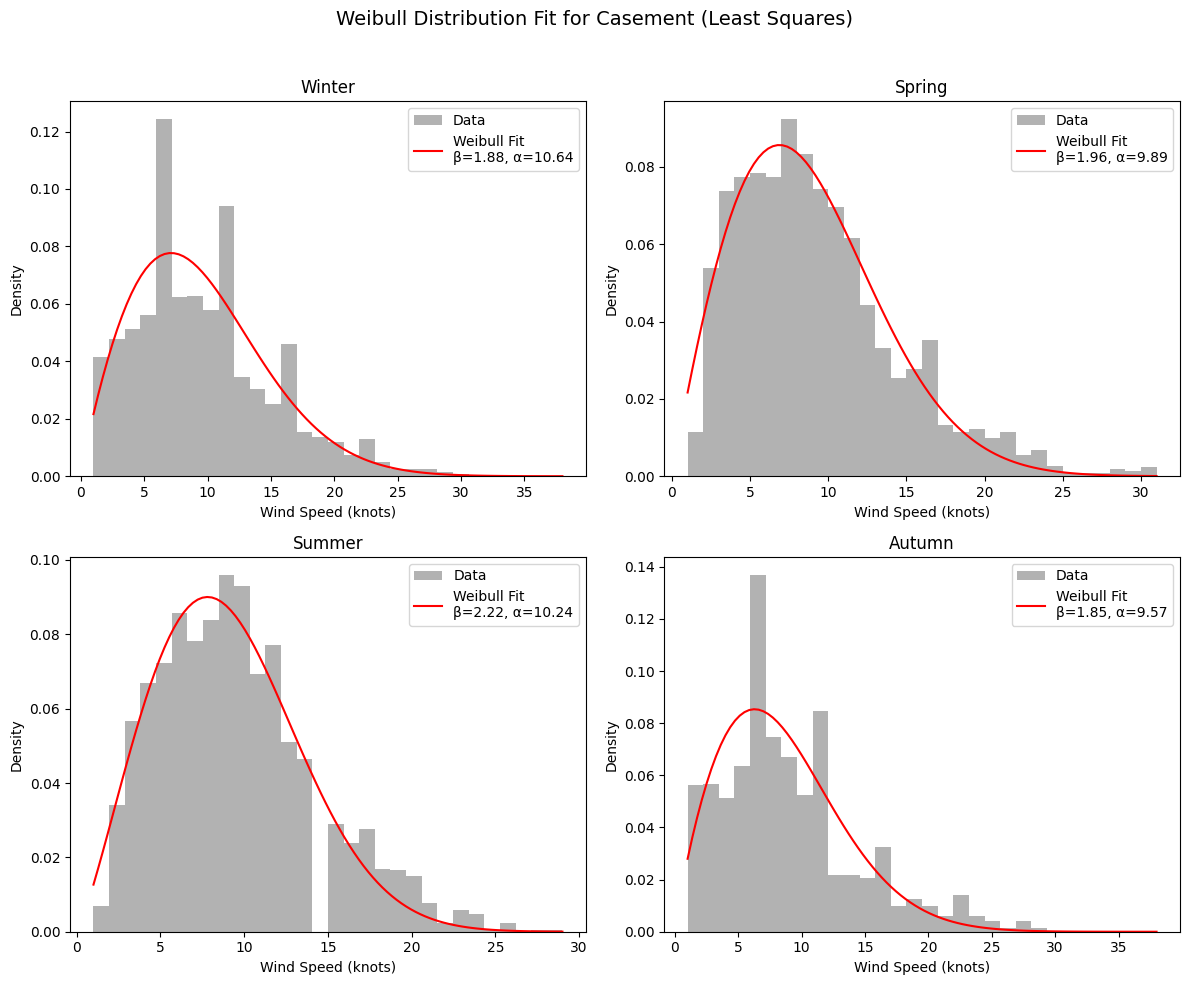

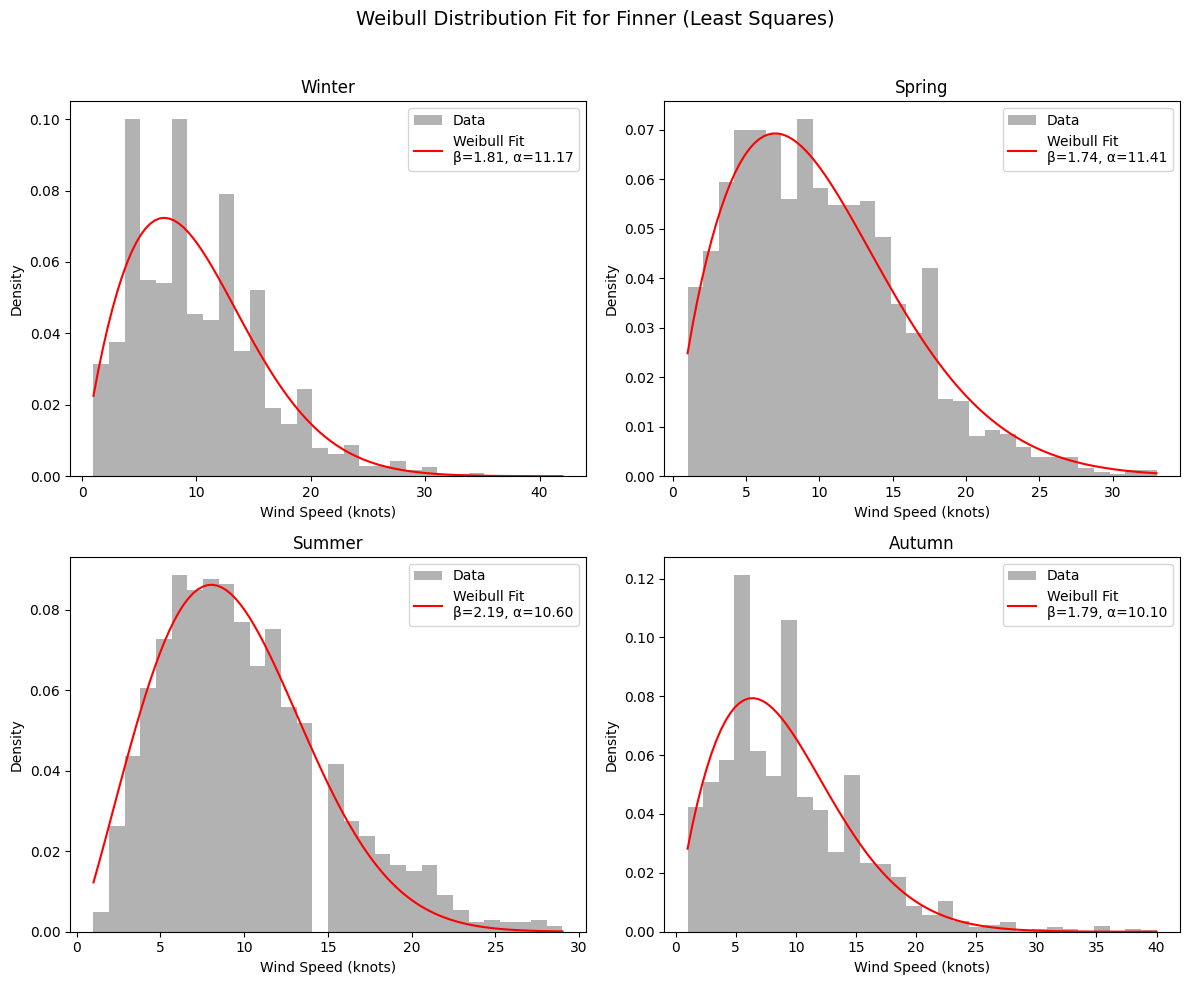

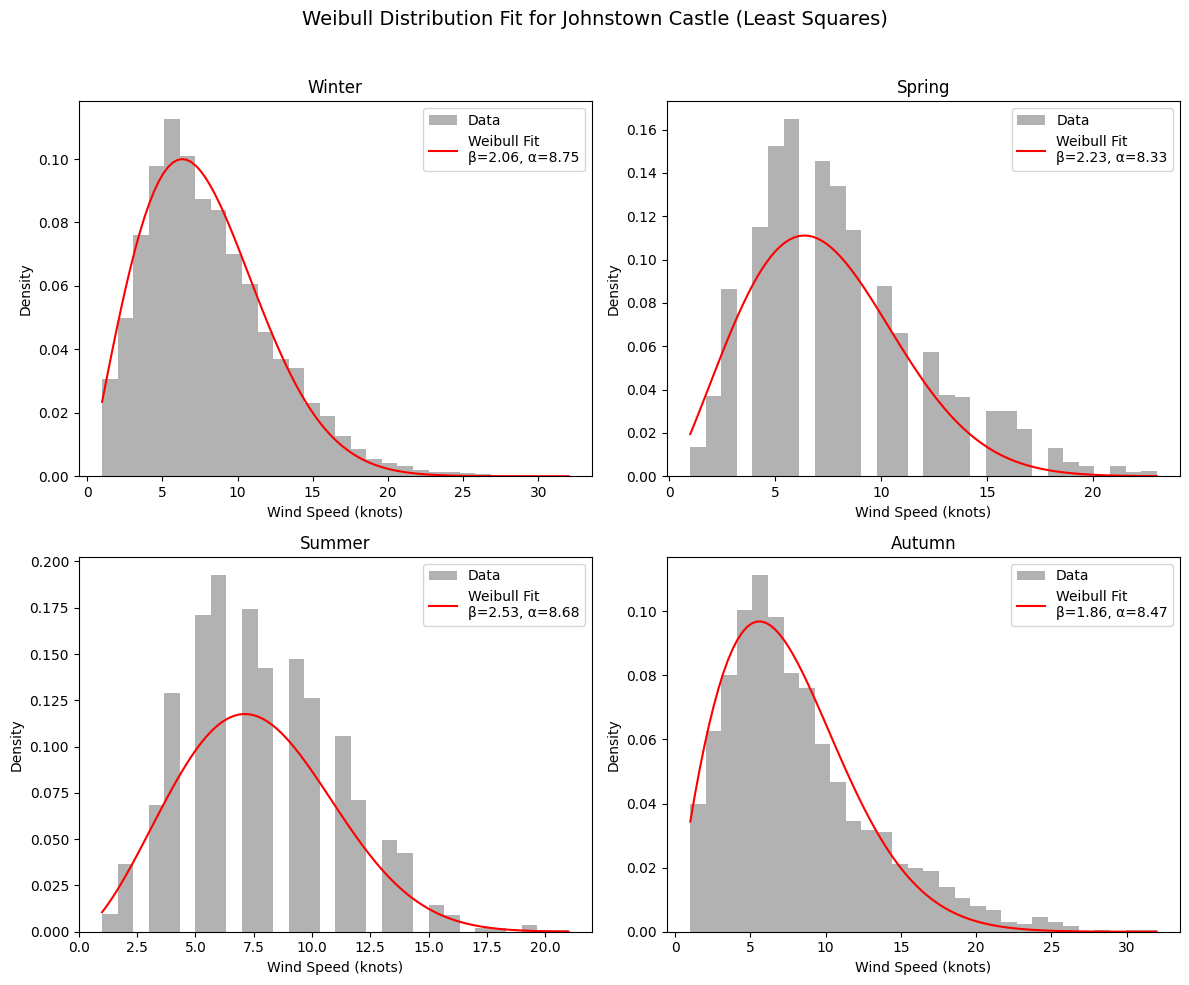

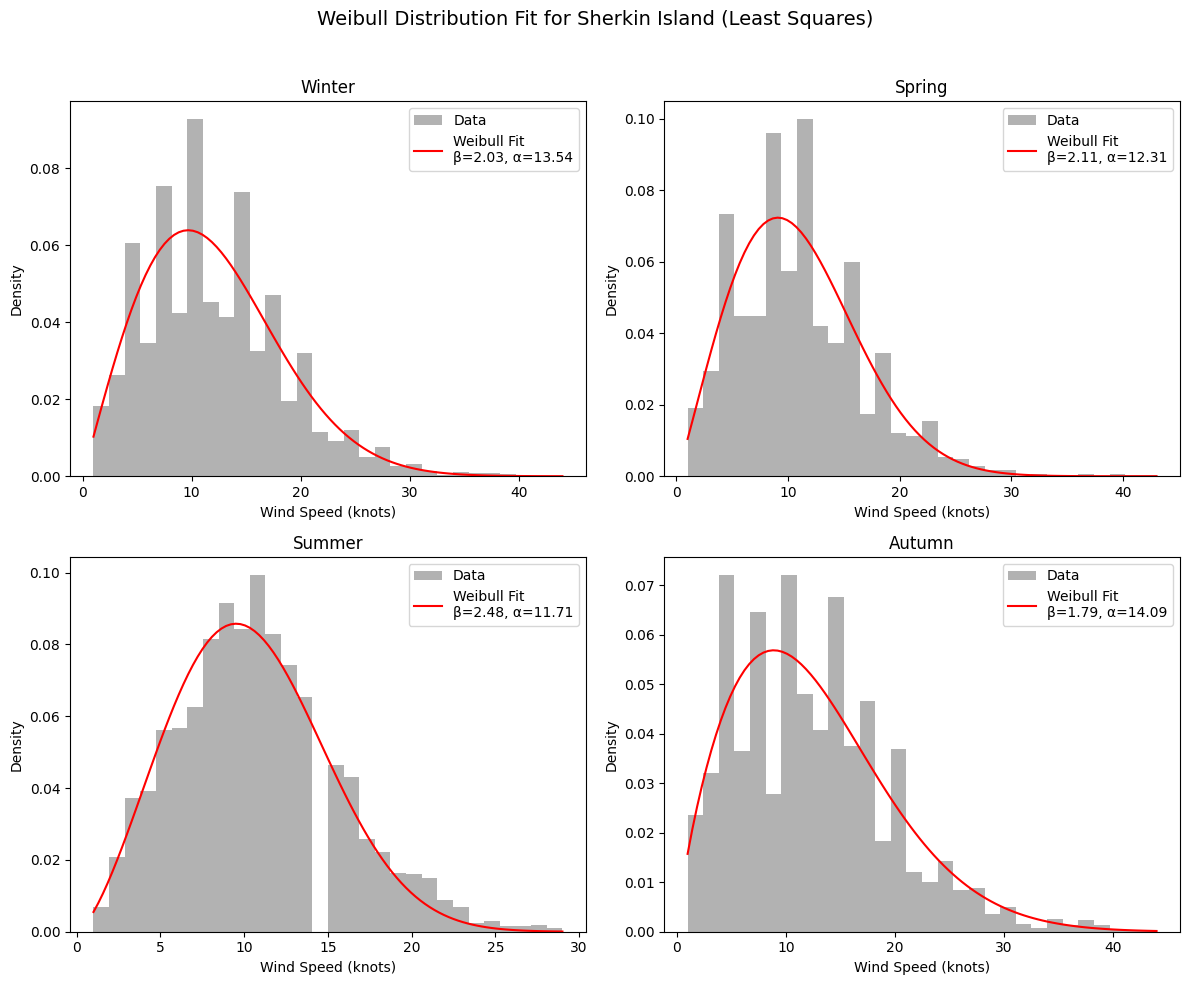

In [28]:
#fit weibull distribution to each station's data for every seasons using Least Sqaures

# Define the Weibull PDF function for curve fitting
def weibull_pdf(x, shape, scale):
    return (shape / scale) * (x / scale)**(shape - 1) * np.exp(-(x / scale)**shape)

# Define the seasons
seasons = {
    'Winter1': ('2024-01-01', '2024-03-19'),
    'Spring': ('2024-03-20', '2024-06-20'),
    'Summer': ('2024-06-21', '2024-09-21'),
    'Autumn': ('2024-09-22', '2024-12-20'),
    'Winter2': ('2024-12-21', '2024-12-31')
}

# Merge Winter1 and Winter2 into a single "Winter"
merged_seasons = {
    'Winter': (pd.to_datetime(seasons['Winter1'][0]), pd.to_datetime(seasons['Winter2'][1])),
    'Spring': (pd.to_datetime(seasons['Spring'][0]), pd.to_datetime(seasons['Spring'][1])),
    'Summer': (pd.to_datetime(seasons['Summer'][0]), pd.to_datetime(seasons['Summer'][1])),
    'Autumn': (pd.to_datetime(seasons['Autumn'][0]), pd.to_datetime(seasons['Autumn'][1]))
}

# Iterate over each station's data
for station_name, df_2024 in whole_data.items():
    df_2024['date'] = pd.to_datetime(df_2024['date'])

    plt.figure(figsize=(12, 10))
    plt.suptitle(f"Weibull Distribution Fit for {station_name} (Least Squares)", fontsize=14)

    for i, (season_name, (start_date, end_date)) in enumerate(merged_seasons.items(), start=1):
        plt.subplot(2, 2, i)

        # Filter data for the current season
        season_df = df_2024[(df_2024['date'] >= start_date) & (df_2024['date'] <= end_date)]
        wind_speeds = season_df['wdsp'].dropna().values  # Drop NA values

        if len(wind_speeds) > 0:
            # Fit Weibull distribution using Least Squares Method
            hist, bin_edges = np.histogram(wind_speeds, bins=30, density=True)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

            initial_guess = [2.0, np.mean(wind_speeds)]

            params, _ = curve_fit(weibull_pdf, bin_centers, hist, p0=initial_guess)
            shape, scale = params

            x = np.linspace(wind_speeds.min(), wind_speeds.max(), 100)
            pdf = weibull_pdf(x, shape, scale)

            # Plot histogram and Weibull fit
            plt.hist(wind_speeds, bins=30, density=True, alpha=0.6, label="Data", color='gray')
            plt.plot(x, pdf, label=f'Weibull Fit\nβ={shape:.2f}, α={scale:.2f}', color='red')

        plt.title(f"{season_name}", fontsize=12)
        plt.xlabel("Wind Speed (knots)")
        plt.ylabel("Density")
        plt.legend(fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.show()

In [29]:
AIR_DENSITY = 1.225  # kg/m^3 (standard air density at sea level)

# Define seasons
seasons = {
    'Winter1': ('2024-01-01', '2024-03-19'),
    'Spring': ('2024-03-20', '2024-06-20'),
    'Summer': ('2024-06-21', '2024-09-21'),
    'Autumn': ('2024-09-22', '2024-12-20'),
    'Winter2': ('2024-12-21', '2024-12-31')
}

# Merge Winter1 and Winter2 into a single "Winter"
merged_seasons = {
    'Winter': (pd.to_datetime(seasons['Winter1'][0]), pd.to_datetime(seasons['Winter2'][1])),
    'Spring': (pd.to_datetime(seasons['Spring'][0]), pd.to_datetime(seasons['Spring'][1])),
    'Summer': (pd.to_datetime(seasons['Summer'][0]), pd.to_datetime(seasons['Summer'][1])),
    'Autumn': (pd.to_datetime(seasons['Autumn'][0]), pd.to_datetime(seasons['Autumn'][1]))
}

# Define Weibull CDF function for curve fitting
def weibull_cdf(v, k, c):
    return 1 - np.exp(-((v / c) ** k))

# Function to calculate Weibull parameters using Least Squares Method
def least_squares_method(wind_speeds):
    sorted_wind_speeds = np.sort(wind_speeds)
    empirical_cdf = np.arange(1, len(sorted_wind_speeds) + 1) / len(sorted_wind_speeds)
    
    # Provide better initial guesses for k and c
    mean_wind_speed = np.mean(wind_speeds)
    std_wind_speed = np.std(wind_speeds)
    k_guess = (std_wind_speed / mean_wind_speed) ** (-1.086)
    c_guess = mean_wind_speed / gamma(1 + 1 / k_guess)

    params, _ = curve_fit(weibull_cdf, sorted_wind_speeds, empirical_cdf, p0=[k_guess, c_guess], maxfev=5000)
    k, c = params
    return k, c

# Function to calculate Weibull parameters using Power Density Method
def power_density_method(wind_speeds):
    mean_wind_speed = np.mean(wind_speeds)
    std_wind_speed = np.std(wind_speeds)
    k = (std_wind_speed / mean_wind_speed) ** (-1.086)
    c = mean_wind_speed / gamma(1 + 1 / k)
    return k, c

# Function to calculate Cramér-von Mises statistic
def cramer_von_mises_statistic(wind_speeds, k, c):
    sorted_wind_speeds = np.sort(wind_speeds)
    n = len(sorted_wind_speeds)
    empirical_cdf = np.arange(1, n + 1) / n
    fitted_cdf = weibull_cdf(sorted_wind_speeds, k, c)
    cvm = np.sum((fitted_cdf - (2 * np.arange(1, n + 1) - 1) / (2 * n)) ** 2) + 1 / (12 * n)
    return cvm

# Function to calculate evaluation metrics
def evaluate_model(wind_speeds, k, c):
    x = np.linspace(wind_speeds.min(), wind_speeds.max(), 100)
    pdf = weibull_min.pdf(x, k, scale=c)
    
    # MAE and RMSE
    hist, bin_edges = np.histogram(wind_speeds, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    predicted_pdf = weibull_min.pdf(bin_centers, k, scale=c)
    mae = np.mean(np.abs(hist - predicted_pdf))
    rmse = np.sqrt(np.mean((hist - predicted_pdf) ** 2))
    
    # R-squared
    ss_total = np.sum((hist - np.mean(hist)) ** 2)
    ss_residual = np.sum((hist - predicted_pdf) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    # KS test
    ks_statistic, _ = ks_2samp(wind_speeds, weibull_min.rvs(k, scale=c, size=len(wind_speeds)))
    
    # Cramér-von Mises statistic
    cvm_statistic = cramer_von_mises_statistic(wind_speeds, k, c)
    
    return mae, rmse, r_squared, ks_statistic, cvm_statistic

# Initialize a dictionary to store aggregated evaluation results
aggregated_results = {
    'Power Density': {'MAE': [], 'RMSE': [], 'R-squared': [], 'KS Statistic': [], 'CvM Statistic': []},
    'Least Squares': {'MAE': [], 'RMSE': [], 'R-squared': [], 'KS Statistic': [], 'CvM Statistic': []},
    'MLE': {'MAE': [], 'RMSE': [], 'R-squared': [], 'KS Statistic': [], 'CvM Statistic': []}
}

for station_name, df_2024 in whole_data.items():
    df_2024['date'] = pd.to_datetime(df_2024['date'])

    for season_name, (start_date, end_date) in merged_seasons.items():
        # Filter data for the current season
        season_df = df_2024[(df_2024['date'] >= start_date) & (df_2024['date'] <= end_date)]
        wind_speeds = season_df['wdsp'].dropna().values  # Drop NA values

        if len(wind_speeds) > 0:
            # Power Density Method
            k_pd, c_pd = power_density_method(wind_speeds)
            mae_pd, rmse_pd, r2_pd, ks_pd, cvm_pd = evaluate_model(wind_speeds, k_pd, c_pd)
            aggregated_results['Power Density']['MAE'].append(mae_pd)
            aggregated_results['Power Density']['RMSE'].append(rmse_pd)
            aggregated_results['Power Density']['R-squared'].append(r2_pd)
            aggregated_results['Power Density']['KS Statistic'].append(ks_pd)
            aggregated_results['Power Density']['CvM Statistic'].append(cvm_pd)

            # Least Squares Method
            k_ls, c_ls = least_squares_method(wind_speeds)
            mae_ls, rmse_ls, r2_ls, ks_ls, cvm_ls = evaluate_model(wind_speeds, k_ls, c_ls)
            aggregated_results['Least Squares']['MAE'].append(mae_ls)
            aggregated_results['Least Squares']['RMSE'].append(rmse_ls)
            aggregated_results['Least Squares']['R-squared'].append(r2_ls)
            aggregated_results['Least Squares']['KS Statistic'].append(ks_ls)
            aggregated_results['Least Squares']['CvM Statistic'].append(cvm_ls)

            # MLE
            k_mle, _, c_mle = weibull_min.fit(wind_speeds, floc=0)
            mae_mle, rmse_mle, r2_mle, ks_mle, cvm_mle = evaluate_model(wind_speeds, k_mle, c_mle)
            aggregated_results['MLE']['MAE'].append(mae_mle)
            aggregated_results['MLE']['RMSE'].append(rmse_mle)
            aggregated_results['MLE']['R-squared'].append(r2_mle)
            aggregated_results['MLE']['KS Statistic'].append(ks_mle)
            aggregated_results['MLE']['CvM Statistic'].append(cvm_mle)
average_results = {}
for method, metrics in aggregated_results.items():
    average_results[method] = {
        'MAE': np.mean(metrics['MAE']),
        'RMSE': np.mean(metrics['RMSE']),
        'R-squared': np.mean(metrics['R-squared']),
        'KS Statistic': np.mean(metrics['KS Statistic']),
        'CvM Statistic': np.mean(metrics['CvM Statistic'])
    }
average_results_df = pd.DataFrame(average_results).T
print("Average Evaluation Results Across All Seasons:")
print(average_results_df)

Average Evaluation Results Across All Seasons:
                    MAE      RMSE  R-squared  KS Statistic  CvM Statistic
Power Density  0.008801  0.013868   0.820943      0.063396       1.859328
Least Squares  0.008799  0.013675   0.824832      0.055434       1.578147
MLE            0.008829  0.013892   0.820494      0.064856       1.931550
